In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
df = pd.read_csv('walmart_dataset_PhD.csv')

In [4]:
# print the first 5 rows
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,No,No,No,0.46
1,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,No,No,No,0.46
2,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,NaN,NaN,NaN,NaN,No,No,No,0.46
3,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,NaN,NaN,NaN,NaN,Yes,Yes,No,0.46
4,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,NaN,NaN,NaN,NaN,Yes,No,Yes,0.46


In [5]:
# print out the shape of the dataset
df.shape

(46027957, 22)

In [6]:
#get some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sales         int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       object 
 19  snap_TX       object 
 20  snap_WI       object 
 21  sell_price    float64
dtypes: float64(1), int64(5), object(16)
memory usage: 7.5+ GB


## Data Preprocessing

In [7]:
# summary statistics of the numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,46027957.0,1.427294,4.310440,0.00,0.00,0.00,1.00,763.00
wm_yr_wk,46027957.0,11373.480404,143.775567,11101.00,11243.00,11406.00,11511.00,11613.00
wday,46027957.0,3.996688,2.000825,1.00,2.00,4.00,6.00,7.00
month,46027957.0,6.398704,3.480230,1.00,3.00,6.00,9.00,12.00
year,46027957.0,2013.552382,1.470835,2011.00,2012.00,2014.00,2015.00,2016.00
sell_price,46027957.0,4.408089,3.403657,0.01,2.18,3.47,5.84,107.32


In [8]:
(df.isnull().sum()/len(df))*100

id               0.000000
item_id          0.000000
dept_id          0.000000
cat_id           0.000000
store_id         0.000000
state_id         0.000000
d                0.000000
sales            0.000000
date             0.000000
wm_yr_wk         0.000000
weekday          0.000000
wday             0.000000
month            0.000000
year             0.000000
event_name_1    91.990976
event_type_1    91.990976
event_name_2    99.794727
event_type_2    99.794727
snap_CA          0.000000
snap_TX          0.000000
snap_WI          0.000000
sell_price       0.000000
dtype: float64

There are missing values in the dataset. The values are all over 90 percent and will all be deleted.

In [9]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 0


In [10]:
x = df['sales']

# Calculate the correlations between x and all other variables in the dataset
correlations = df.corrwith(x)

# Print the correlations
print(correlations)

sales         1.000000
wm_yr_wk     -0.038909
wday         -0.032059
month        -0.004179
year         -0.038109
sell_price   -0.150920
dtype: float64


**Data Cleaning**

In [11]:
# drop the variables with over 90 percent missing values, and other categorical variables not needed.
df.drop(['id','item_id','dept_id','cat_id','store_id','wm_yr_wk','weekday','wday',
        'event_name_1','event_type_1','event_name_2','event_type_2','date'],axis=1,inplace=True)

In [12]:
df.head()

,state_id,d,sales,month,year,snap_CA,snap_TX,snap_WI,sell_price
0,CA,d_1,12,1,2011,No,No,No,0.46
1,CA,d_2,15,1,2011,No,No,No,0.46
2,CA,d_3,0,1,2011,No,No,No,0.46
3,CA,d_4,0,2,2011,Yes,Yes,No,0.46
4,CA,d_5,0,2,2011,Yes,No,Yes,0.46


**Feature Engineering**


I will create moving averages for 28 window period. 28 window period was chosen because the goal is to predict demand every 28 days. I will aslo create a total price variable.

In [13]:
# write a function to create a simple moving average, exponential moving average and cumulative moving average for a 30 window period from a daily energy consumption variable and return the dataframe plus the created variables

def create_moving_averages(df):
    # Simple Moving Average
    df['simple_moving_average']=df['sales'].rolling(window=28, min_periods=1).mean()
    
    # Exponential Moving Average
    df['exp_weighted_moving_average']=df['sales'].ewm(span=28).mean()
    
    # Cumulative Moving Average
    df['cum_moving_average']=df['sales'].expanding().mean()
    
    return df

df = create_moving_averages(df)

In [14]:
df['total_price'] = df['sales'] * df['sell_price']

In [15]:
df.head()

,state_id,d,sales,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price
0,CA,d_1,12,1,2011,No,No,No,0.46,12.00,12.000000,12.00,5.52
1,CA,d_2,15,1,2011,No,No,No,0.46,13.50,13.553571,13.50,6.90
2,CA,d_3,0,1,2011,No,No,No,0.46,9.00,8.709307,9.00,0.00
3,CA,d_4,0,2,2011,Yes,Yes,No,0.46,6.75,6.293346,6.75,0.00
4,CA,d_5,0,2,2011,Yes,No,Yes,0.46,5.40,4.848689,5.40,0.00


The categorical values will be encoded using pandas factorize.

In [16]:
# Get a subset of the DataFrame containing only object variables
object_variables = df.select_dtypes(include=['object'])

# Get the column names of the object variables
object_columns = object_variables.columns.tolist()

# Print the column names of the object variables
print("Object variable columns:", object_columns)

Object variable columns: ['state_id', 'd', 'snap_CA', 'snap_TX', 'snap_WI']


In [17]:
df[['state_id', 'snap_CA', 'snap_TX', 'snap_WI']] = df[['state_id', 'snap_CA', 'snap_TX', 'snap_WI']].apply(lambda x: pd.factorize(x)[0])

In [18]:
df.head()

,state_id,d,sales,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price
0,0,d_1,12,1,2011,0,0,0,0.46,12.00,12.000000,12.00,5.52
1,0,d_2,15,1,2011,0,0,0,0.46,13.50,13.553571,13.50,6.90
2,0,d_3,0,1,2011,0,0,0,0.46,9.00,8.709307,9.00,0.00
3,0,d_4,0,2,2011,1,1,0,0.46,6.75,6.293346,6.75,0.00
4,0,d_5,0,2,2011,1,0,1,0.46,5.40,4.848689,5.40,0.00


**Create Train and Test Datasets**

Since the objective is to predict demand every 28 days, the last 28 days of sale will be extracted as the test data.

In [19]:
df['d'] = df.d.str.strip('d_') #remove the characters from the string and then convert object to numneric to enable extracting the test set

In [20]:
# this variable's data type will be changed to integer to enable the extraction of the test data

df['d'] = df['d'].astype('int64')

In [21]:

## downcasting loop
for column in df:
    if df[column].dtype == 'float64':
        df[column]=pd.to_numeric(df[column], downcast='float')
    if df[column].dtype == 'int64':
        df[column]=pd.to_numeric(df[column], downcast='integer')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   state_id                     int8   
 1   d                            int16  
 2   sales                        int16  
 3   month                        int8   
 4   year                         int16  
 5   snap_CA                      int8   
 6   snap_TX                      int8   
 7   snap_WI                      int8   
 8   sell_price                   float32
 9   simple_moving_average        float32
 10  exp_weighted_moving_average  float32
 11  cum_moving_average           float32
 12  total_price                  float32
dtypes: float32(5), int16(3), int8(5)
memory usage: 1.3 GB


In [23]:
# function to create the train and test datasets

def extract_train_test_samples(df):
    # Get the minimum and maximum values of the 'd' column
    d_min = df['d'].min()
    d_max = df['d'].max()
    
    # Extract the test sample in the order of df[df['d'] >= d_max - 28]
    test_sample = df[df['d'] >= d_max - 28].sort_values(by='d')
    
    # Extract the train sample in the order of df[(df['d'] >= d_min) & (df['d'] < d_max - 28)]
    train_sample = df[(df['d'] >= d_min) & (df['d'] < d_max - 28)].sort_values(by='d')
    
    return train_sample, test_sample

train_sample, test_sample = extract_train_test_samples(df)

In [24]:
print(train_sample.head())
print(train_sample.shape)
print(test_sample.head())
print(test_sample.shape)

       state_id  d  sales  month  year  snap_CA  snap_TX  snap_WI  sell_price  \
0             0  1     12      1  2011        0        0        0        0.46   
31906         1  1      0      1  2011        0        0        0        3.67   
31899         1  1      0      1  2011        0        0        0       12.12   
31892         1  1      1      1  2011        0        0        0        2.57   
31885         1  1      1      1  2011        0        0        0        6.44   

       simple_moving_average  exp_weighted_moving_average  cum_moving_average  \
0                  12.000000                    12.000000           12.000000   
31906               0.892857                     0.709585            2.601843   
31899               0.750000                     0.653497            2.602226   
31892               1.035714                     0.929516            2.602734   
31885               1.428571                     1.313224            2.603243   

       total_price  
0    

**Feature Scoring using SelectkBest**

In [25]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression, mutual_info_regression

In [26]:
X = train_sample.drop(['sales'],axis=1)

y = train_sample['sales']

In [27]:
X.head()

,state_id,d,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price
0,0,1,1,2011,0,0,0,0.46,12.000000,12.000000,12.000000,5.52
31906,1,1,1,2011,0,0,0,3.67,0.892857,0.709585,2.601843,0.00
31899,1,1,1,2011,0,0,0,12.12,0.750000,0.653497,2.602226,0.00
31892,1,1,1,2011,0,0,0,2.57,1.035714,0.929516,2.602734,2.57
31885,1,1,1,2011,0,0,0,6.44,1.428571,1.313224,2.603243,6.44


In [28]:
y

0           12
31906        0
31899        0
31892        1
31885        1
            ..
45184349     1
45184342     2
45184335     1
45184419     0
45326680     0
Name: sales, Length: 45143747, dtype: int16

In [29]:
X.shape

(45143747, 12)

In [33]:
bestfeatures = SelectKBest(score_func=mutual_info_regression, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [34]:
featureScores.columns = ['Features','Score']
featureScores

,Features,Score
0,state_id,0.001975
1,d,0.006258
2,month,0.000607
3,year,0.010732
4,snap_CA,0.000558
5,snap_TX,0.000544
6,snap_WI,0.000285
7,sell_price,0.081572
8,simple_moving_average,0.103676
9,exp_weighted_moving_average,0.165848


In [35]:
featureScores.sort_values(by=['Score'],ascending = False)

,Features,Score
11,total_price,1.269487
9,exp_weighted_moving_average,0.165848
8,simple_moving_average,0.103676
7,sell_price,0.081572
10,cum_moving_average,0.031071
3,year,0.010732
1,d,0.006258
0,state_id,0.001975
2,month,0.000607
4,snap_CA,0.000558


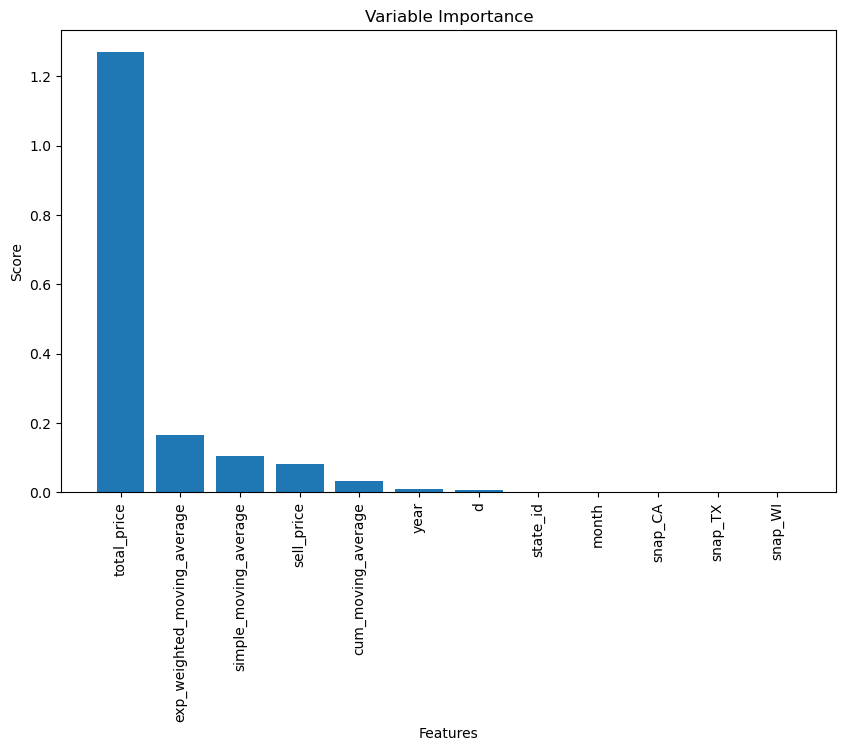

In [37]:
# Plot a bar chart to display feature scores in descending order.
def plot_feature_scores(feature_scores_df):
    # Sort the dataframe by 'Score' column in descending order
    sorted_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_scores_df['Features'], sorted_scores_df['Score'])
    plt.xlabel('Features')
    plt.ylabel('Score')
    plt.title('Variable Importance')
    plt.xticks(rotation=90)
    plt.show()

# Call the plot function with the given featureScores dataframe
plot_feature_scores(featureScores)